### Google Colab Notebook

Run this notebook only after uploading the zip files for data and model weights

In [1]:
!pip install keras==2.2.4

     |████████████████████████████████| 317kB 2.9MB/s 
  Found existing installation: Keras 2.2.5
    Uninstalling Keras-2.2.5:
      Successfully uninstalled Keras-2.2.5


In [2]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [6]:
!pwd

/content


In [0]:
!cp '/gdrive/My Drive/Glaucoma/data.zip' '/content/'
!cp '/gdrive/My Drive/Glaucoma/Model_Weights.zip' '/content/'

In [8]:
!unzip -q data.zip

replace disc12/49d.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [9]:
!unzip Model_Weights.zip

Archive:  Model_Weights.zip
replace Model_Weights/best_ever_cup.hdf5? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [0]:
!mkdir cup
!mkdir disc
!mkdir cupinp

![alt text](https://drive.google.com/uc?id=1JkNyv_sdnRK2f7kkLaklwrv67L7jdfL_)

In [0]:
%load_ext autoreload
%autoreload 2

In [0]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [13]:
from keras.models import Model
from keras.layers import Input, Convolution2D, MaxPooling2D, concatenate, UpSampling2D
from keras import backend as K

Using TensorFlow backend.


In [0]:
K.set_image_dim_ordering('th')

In [0]:
def tf_to_th_encoding(X):
    return np.rollaxis(X, 3, 1)


def th_to_tf_encoding(X):
    return np.rollaxis(X, 1, 4)

### Loading Data

(50, 3, 128, 128)


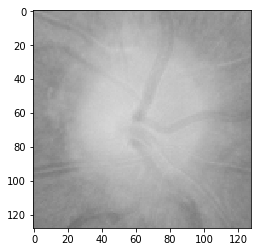

In [16]:
#loading data on which predictions are to be made
from glob import glob
import matplotlib.image as mpimg
i=0
loc = 'inputim/'
X = list()
for i in range(1,51):
    image1 = mpimg.imread(loc + str(i) + '.png')
    image1 = np.array(image1)
    image1 = cv2.resize(image1, (128,128))
    b,g,r = cv2.split(image1)
    image1 = cv2.merge((b,b,b))
    X.append(image1)
X = np.array(X)
X = tf_to_th_encoding(X)
print(X.shape)
plt.imshow(image1)

In [0]:
#model for Disc

import cv2
def get_unet_light(img_rows=256, img_cols=256):
    inputs = Input((3, img_rows, img_cols))
    conv1 = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(inputs)
    #conv1 = #Dropout(0.6)(conv1)
    conv1 = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(conv1)
    #conv1 = #Dropout(0.6)(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Convolution2D(64, 3, 3, activation='relu', border_mode='same')(pool1)
    #conv2 = #Dropout(0.6)(conv2)
    conv2 = Convolution2D(64, 3, 3, activation='relu', border_mode='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Convolution2D(64, 3, 3, activation='relu', border_mode='same')(pool2)
    #conv3 = #Dropout(0.6)(conv3)
    conv3 = Convolution2D(64, 3, 3, activation='relu', border_mode='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Convolution2D(64, 3, 3, activation='relu', border_mode='same')(pool3)
    #conv4 = #Dropout(0.6)(conv4)
    conv4 = Convolution2D(64, 3, 3, activation='relu', border_mode='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Convolution2D(64, 3, 3, activation='relu', border_mode='same')(pool4)
    #conv5 = #Dropout(0.6)(conv5)
    conv5 = Convolution2D(64, 3, 3, activation='relu', border_mode='same')(conv5)

    up6 = concatenate([UpSampling2D(size=(2, 2))(conv5), conv4],axis=1)
    #up6 = merge([UpSampling2D(size=(2, 2))(conv5), conv4], mode='concat', concat_axis=1)
    conv6 = Convolution2D(64, 3, 3, activation='relu', border_mode='same')(up6)
    #conv6 = #Dropout(0.6)(conv6)
    conv6 = Convolution2D(64, 3, 3, activation='relu', border_mode='same')(conv6)

    up7 = concatenate([UpSampling2D(size=(2, 2))(conv6), conv3],axis=1)
    #up7 = merge([UpSampling2D(size=(2, 2))(conv6), conv3], mode='concat', concat_axis=1)
    conv7 = Convolution2D(64, 3, 3, activation='relu', border_mode='same')(up7)
    #conv7 = #Dropout(0.6)(conv7)
    conv7 = Convolution2D(64, 3, 3, activation='relu', border_mode='same')(conv7)

    up8 = concatenate([UpSampling2D(size=(2, 2))(conv7), conv2],axis=1)
    #up8 = merge([UpSampling2D(size=(2, 2))(conv7), conv2], mode='concat', concat_axis=1)
    conv8 = Convolution2D(64, 3, 3, activation='relu', border_mode='same')(up8)
    #conv8 = #Dropout(0.6)(conv8)
    conv8 = Convolution2D(64, 3, 3, activation='relu', border_mode='same')(conv8)

    up9 = concatenate([UpSampling2D(size=(2, 2))(conv8), conv1],axis=1)
    #up9 = merge([UpSampling2D(size=(2, 2))(conv8), conv1], mode='concat', concat_axis=1)
    conv9 = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(up9)
    #conv9 = #Dropout(0.6)(conv9)
    conv9 = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(conv9)
    #conv9 = #Dropout(0.6)(conv9)

    conv10 = Convolution2D(1, 1, 1, activation='sigmoid')(conv9)

    model = Model(input=inputs, output=conv10)

    return model


In [0]:
model = get_unet_light(img_rows=128, img_cols=128)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  """


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", p

In [0]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 3, 128, 128)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 128, 128) 896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 128, 128) 9248        conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 32, 64, 64)   0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (

In [0]:
#load disc model
import glob
model_path = 'Model_Weights/Best_so_far_disc_gray.hdf5'
model.load_weights(model_path)

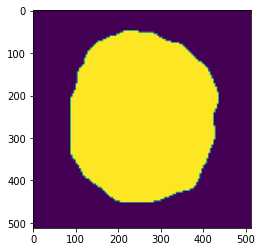

In [0]:
#Predicting disc
timages = 'disc/'
for i in range(X.shape[0]):
    
    batch_X = X[i:i + 1]
    
    pred = (model.predict(batch_X)[0, 0] > 0.5).astype(np.float64)
    v=str(i+1)
    tim = timages + v + '.png'
    pred = pred * 255
    pred = cv2.resize(pred, (512,512))
    cv2.imwrite(tim, pred)
plt.imshow(pred)

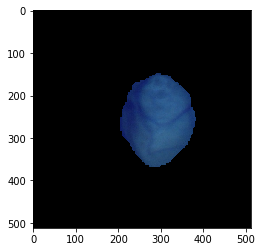

In [0]:
#make input image for cup from prediction of disc
from glob import glob
X_cup = list()
loc = "inputim/"
loc2 = 'disc/'
loc3 = 'cupinp/'

for i in range(1,51):
    val = str(i)
    extn = '.png'
    
    img = loc + val + extn

    img2 = loc2 + val + extn
    img3 = loc3 + val + extn
    image1 = cv2.imread(img)
    image2 = cv2.imread(img2)
    gray_image = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    _, thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

    b,g,r = cv2.split(image1)
    b_and_image = cv2.bitwise_and(b, thresh)
    g_and_image = cv2.bitwise_and(g, thresh)
    r_and_image = cv2.bitwise_and(r, thresh)

    and_image = cv2.merge((b_and_image, g_and_image, r_and_image))


    cv2.imwrite(img3, and_image)

    X_cup.append(and_image)
    i += 1
X_cup = np.array(X_cup)
X_cup= X_cup/255
plt.imshow(X_cup[0])

In [0]:
import cv2
def get_unet_light(img_rows=256, img_cols=256):
    inputs = Input((3, img_rows, img_cols))
    conv1 = Convolution2D(34, 4, 2, activation='relu', border_mode='same')(inputs)
    #conv1 = #Dropout(0.6)(conv1)
    conv1 = Convolution2D(34, 4, 2, activation='relu', border_mode='same')(conv1)
    #conv1 = #Dropout(0.6)(conv1)
    pool1 = MaxPooling2D(pool_size=(4, 4))(conv1)

    conv2 = Convolution2D(64, 4, 4, activation='relu', border_mode='same')(pool1)
    #conv2 = #Dropout(0.6)(conv2)
    conv2 = Convolution2D(64, 4, 4, activation='relu', border_mode='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(4, 4))(conv2)

    conv3 = Convolution2D(64, 4, 4, activation='relu', border_mode='same')(pool2)
    #conv3 = #Dropout(0.6)(conv3)
    conv3 = Convolution2D(64, 4, 4, activation='relu', border_mode='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(4, 4))(conv3)

    conv4 = Convolution2D(64, 4, 4, activation='relu', border_mode='same')(pool3)
    #conv4 = #Dropout(0.6)(conv4)
    conv4 = Convolution2D(64, 4, 4, activation='relu', border_mode='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(4, 4))(conv4)

    conv5 = Convolution2D(64, 4, 4, activation='relu', border_mode='same')(pool4)
    #conv5 = #Dropout(0.6)(conv5)
    conv5 = Convolution2D(64, 4, 4, activation='relu', border_mode='same')(conv5)

    up6 = concatenate([UpSampling2D(size=(4, 4))(conv5), conv4],axis=1)
    #up6 = merge([UpSampling2D(size=(4, 4))(conv5), conv4], mode='concat', concat_axis=1)
    conv6 = Convolution2D(64, 4, 4, activation='relu', border_mode='same')(up6)
    #conv6 = #Dropout(0.6)(conv6)
    conv6 = Convolution2D(64, 4, 4, activation='relu', border_mode='same')(conv6)

    up7 = concatenate([UpSampling2D(size=(4, 4))(conv6), conv3],axis=1)
    #up7 = merge([UpSampling2D(size=(4, 4))(conv6), conv3], mode='concat', concat_axis=1)
    conv7 = Convolution2D(64, 4, 4, activation='relu', border_mode='same')(up7)
    #conv7 = #Dropout(0.6)(conv7)
    conv7 = Convolution2D(64, 4, 4, activation='relu', border_mode='same')(conv7)

    up8 = concatenate([UpSampling2D(size=(4, 4))(conv7), conv2],axis=1)
    #up8 = merge([UpSampling2D(size=(4, 4))(conv7), conv2], mode='concat', concat_axis=1)
    conv8 = Convolution2D(64, 4, 4, activation='relu', border_mode='same')(up8)
    #conv8 = #Dropout(0.6)(conv8)
    conv8 = Convolution2D(64, 4, 4, activation='relu', border_mode='same')(conv8)

    up9 = concatenate([UpSampling2D(size=(4, 4))(conv8), conv1],axis=1)
    #up9 = merge([UpSampling2D(size=(4, 4))(conv8), conv1], mode='concat', concat_axis=1)
    conv9 = Convolution2D(34, 4, 2, activation='relu', border_mode='same')(up9)
    #conv9 = #Dropout(0.6)(conv9)
    conv9 = Convolution2D(34, 4, 2, activation='relu', border_mode='same')(conv9)
    #conv9 = #Dropout(0.6)(conv9)

    conv10 = Convolution2D(1, 1, 1, activation='sigmoid')(conv9)

    model = Model(input=inputs, output=conv10)

    return model

In [0]:
model = get_unet_light(img_rows=512, img_cols=512)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(34, (4, 2), activation="relu", padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(34, (4, 2), activation="relu", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", padding="same")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu"

In [0]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 3, 512, 512)  0                                            
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 34, 512, 512) 850         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 34, 512, 512) 9282        conv2d_20[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_5 (MaxPooling2D)  (None, 34, 128, 128) 0           conv2d_21[0][0]                  
__________________________________________________________________________________________________
conv2d_22 

### Loading model

In [0]:
import glob
model_path = 'Model_Weights/best_ever_cup.hdf5'
model.load_weights(model_path)

### Prediction of Cup

In [0]:
#Prediction on validation data
timages = 'cup/'
for i in range(X_cup.shape[0]):    
    batch_X = X_cup[i:i + 1]
    batch_X = tf_to_th_encoding(batch_X)
    pred = (model.predict(batch_X)[0, 0] > 0.5).astype(np.float64)
    
    v=str(i+1)
    tim = timages + v + '.png'
    pred = pred * 255
    cv2.imwrite(tim, pred)
    pred =pred / 255.0
    

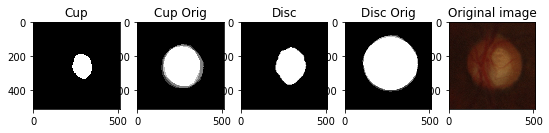

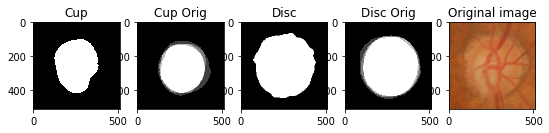

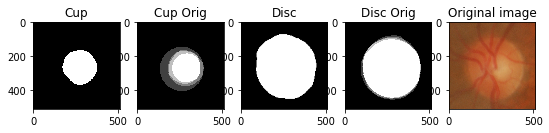

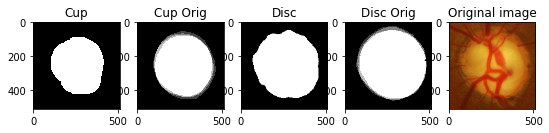

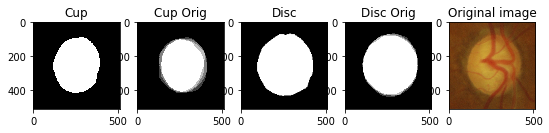

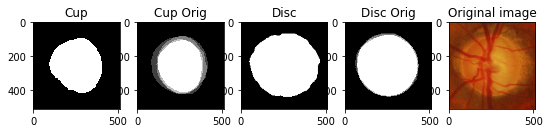

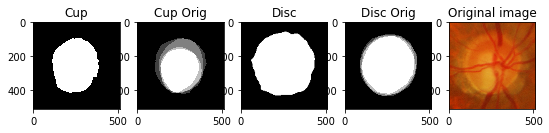

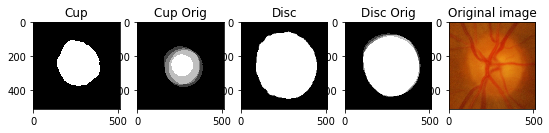

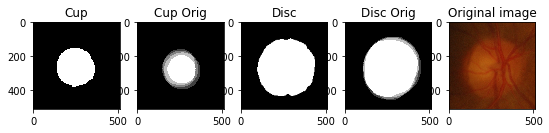

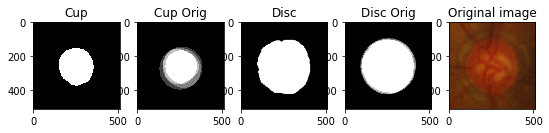

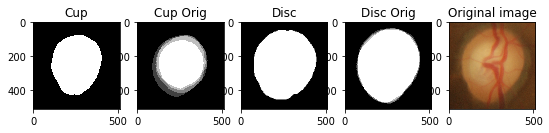

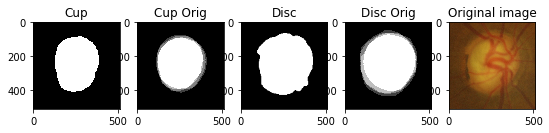

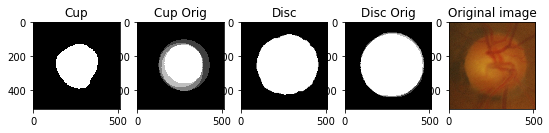

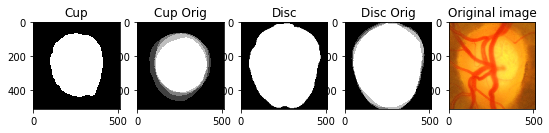

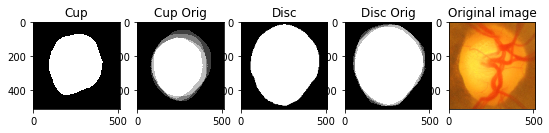

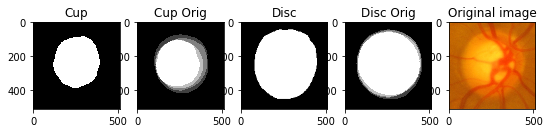

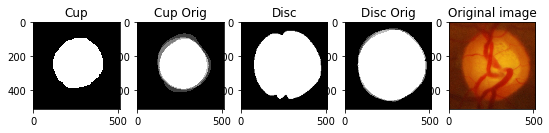

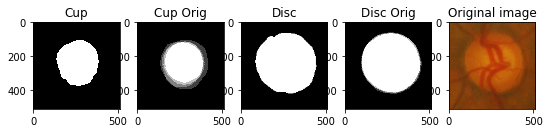

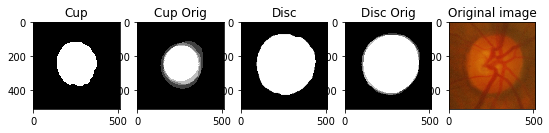

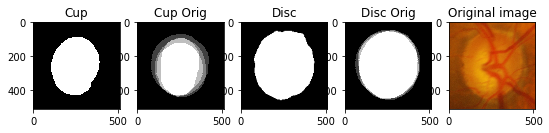

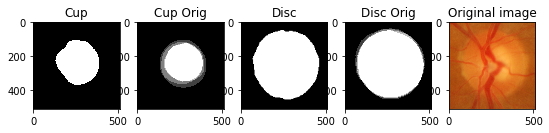

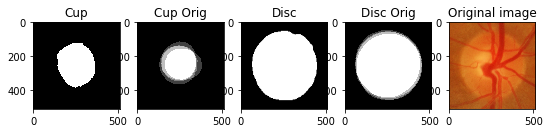

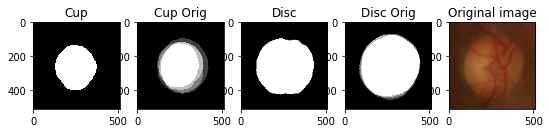

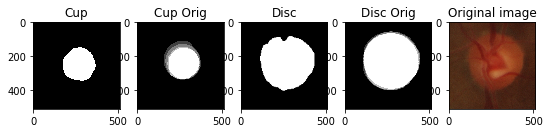

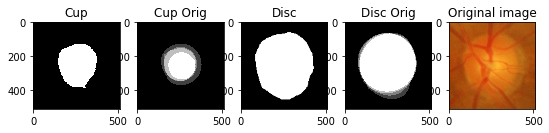

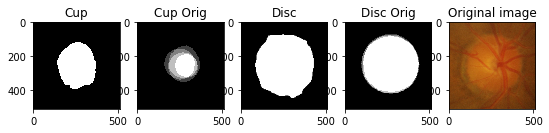

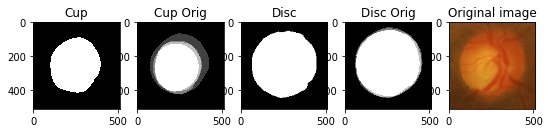

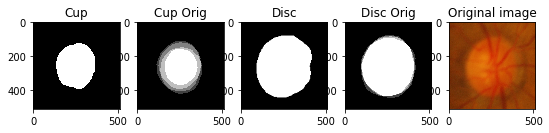

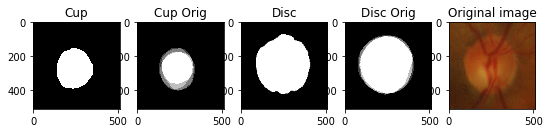

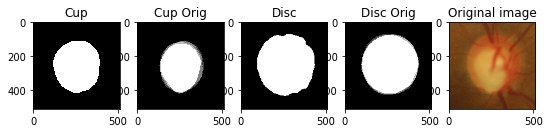

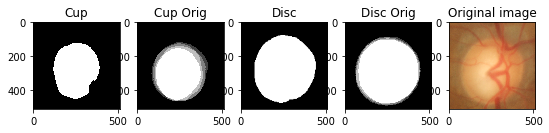

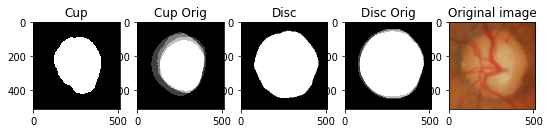

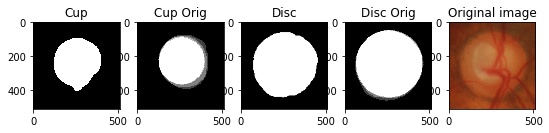

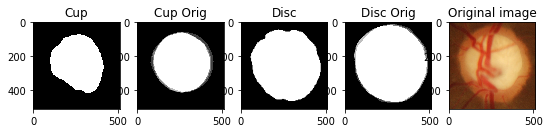

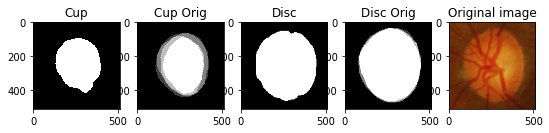

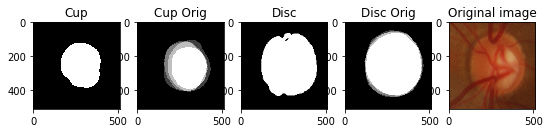

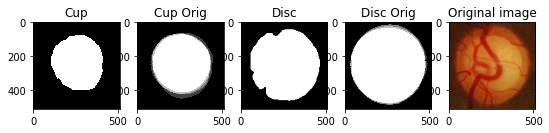

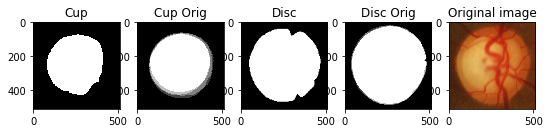

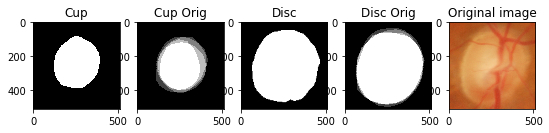

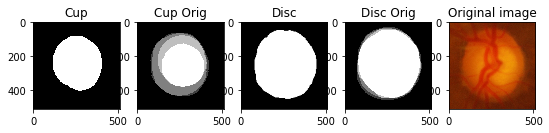

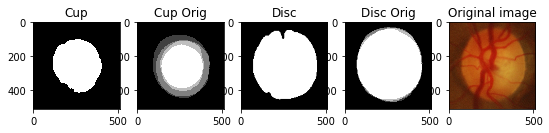

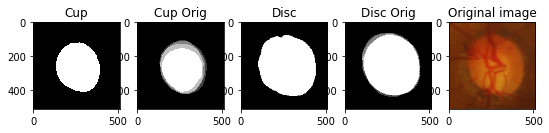

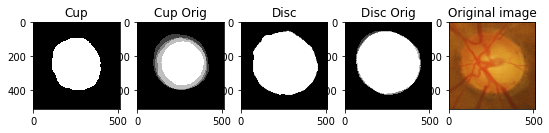

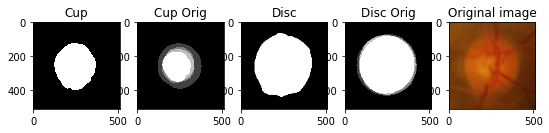

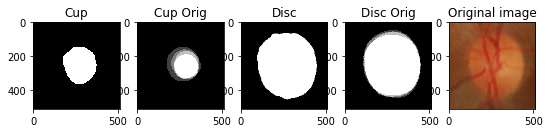

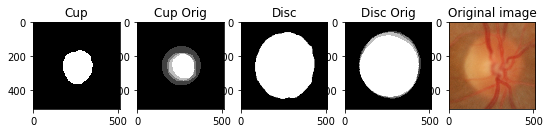

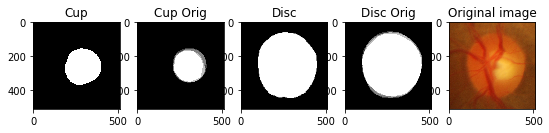

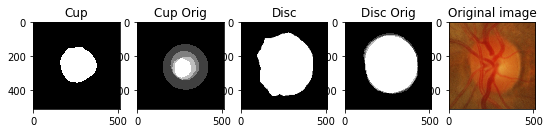

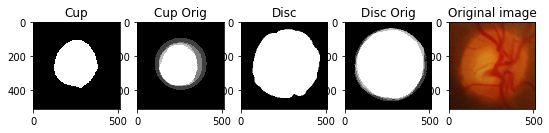

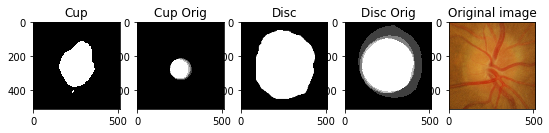

In [0]:
import matplotlib.image as mpimg
from glob import glob
locc = 'inputim/'
loc2 = 'disc/'
loc3 = 'cup/'
loc23 = 'disc12/'
loc33 = 'cup12/'
i = 0
for i in range(1,51):
    val = str(i)
    extn = '.png'
    imgc = locc + val + extn
    image1 = mpimg.imread(imgc)
    img2 = loc2 + val + extn
    img21 = loc23 + val+'d' + extn
    
    img3 = loc3 + val + extn
    img31 = loc33 + val + 'c'+ extn
    image2 = mpimg.imread(img2)
    image21 = mpimg.imread(img21)
    image3 = mpimg.imread(img3)
    image31 = mpimg.imread(img31)
    
    fig = plt.figure(figsize=(9, 4))
    ax = fig.add_subplot(1, 5, 1)
    ax.imshow(image3, cmap=plt.cm.Greys_r)
    ax.set_title('Cup')
    
    ax = fig.add_subplot(1, 5, 2)
    ax.imshow(image31, cmap=plt.cm.Greys_r)
    ax.set_title('Cup Orig')
    
    ax = fig.add_subplot(1, 5, 3)
    ax.imshow(image2, cmap=plt.cm.Greys_r)
    ax.set_title('Disc')
    
    ax = fig.add_subplot(1, 5, 4)
    ax.imshow(image21, cmap=plt.cm.Greys_r)
    ax.set_title('Disc Orig')
    
    ax = fig.add_subplot(1, 5, 5)
    ax.imshow(image1)
    ax.set_title('Original image')
    
    plt.show()
    i += 1


Acquiring scores for the validation set:

In [0]:
#evaluate disc up ratio and predict presence of glaucoma 